### 1. Importing necessary libraries

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score
)
from utils.utils import plot_confusion_matrix, generate_tensor

### 2. Loading the dataset

In [28]:
dataset = pd.read_csv('../dataset/dataset.csv')

test_df = dataset.sample(frac=1.0, random_state=42)
test_data = generate_tensor(test_df, image_size=(96,96), class_mode='categorical')

test_data.image_shape

Found 480 validated image filenames belonging to 2 classes.


(96, 96, 1)

### 3. Loading the Unet-MobileNet model

In [29]:
model = tf.keras.models.load_model('models/trained/model99.h5', compile=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 256)         218400    
                                                                 
 reshape (Reshape)           (None, 1, 256)            0         
                                                                 
 dense (Dense)               (None, 1, 8)              2056      
                                                                 
 dropout (Dropout)           (None, 1, 8)              0         
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 220474 (861.23 KB)
Trainable params: 18 (7

### 4. Making predictions

In [30]:
y_pred = np.argmax(model.predict(test_data), axis=-1)

15/15 [==============================] - 2s 77ms/step


#### 4.1. Classification report

In [31]:
cr = classification_report(test_data.labels, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       240
           1       1.00      0.95      0.97       240

    accuracy                           0.97       480
   macro avg       0.98      0.97      0.97       480
weighted avg       0.98      0.97      0.97       480



#### 4.2. F1, Precision and Recall Score

In [32]:
x = f1_score(test_data.labels, y_pred,)
y = precision_score(test_data.labels, y_pred)
z = recall_score(test_data.labels, y_pred)

In [33]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 97.44%
Precision Score: 100.0%
Recall Score: 95.0%


#### 4.3. Confusion matrix

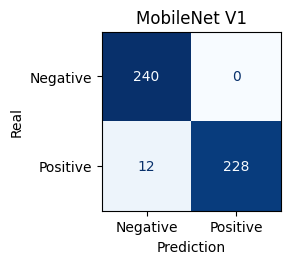

In [34]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title='MobileNet V1')

plt.show()

In [35]:
disp.figure_.savefig('./models/figures/vgg16/mobilenetv1-confusion-matrix.eps')
disp.figure_.savefig('./models/figures/vgg16/mobilenetv1-confusion-matrix.png')

### 4. Evaluating the model

In [36]:
print(model.metrics_names)

[]


In [37]:
loss, acc = model.evaluate(test_data)

15/15 [==============================] - 3s 68ms/step - loss: 0.0982 - accuracy: 0.9750


In [38]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 97.5%
loss: 0.09823038429021835
